In [1]:
from matplotlib.image import imread, imsave
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
image_array = cv2.imreadmulti("MDCK_E-KO_6d_scratch-10h_Phall-647_03_w1CSU642.TIF")

In [3]:
img_stack = image_array[1]

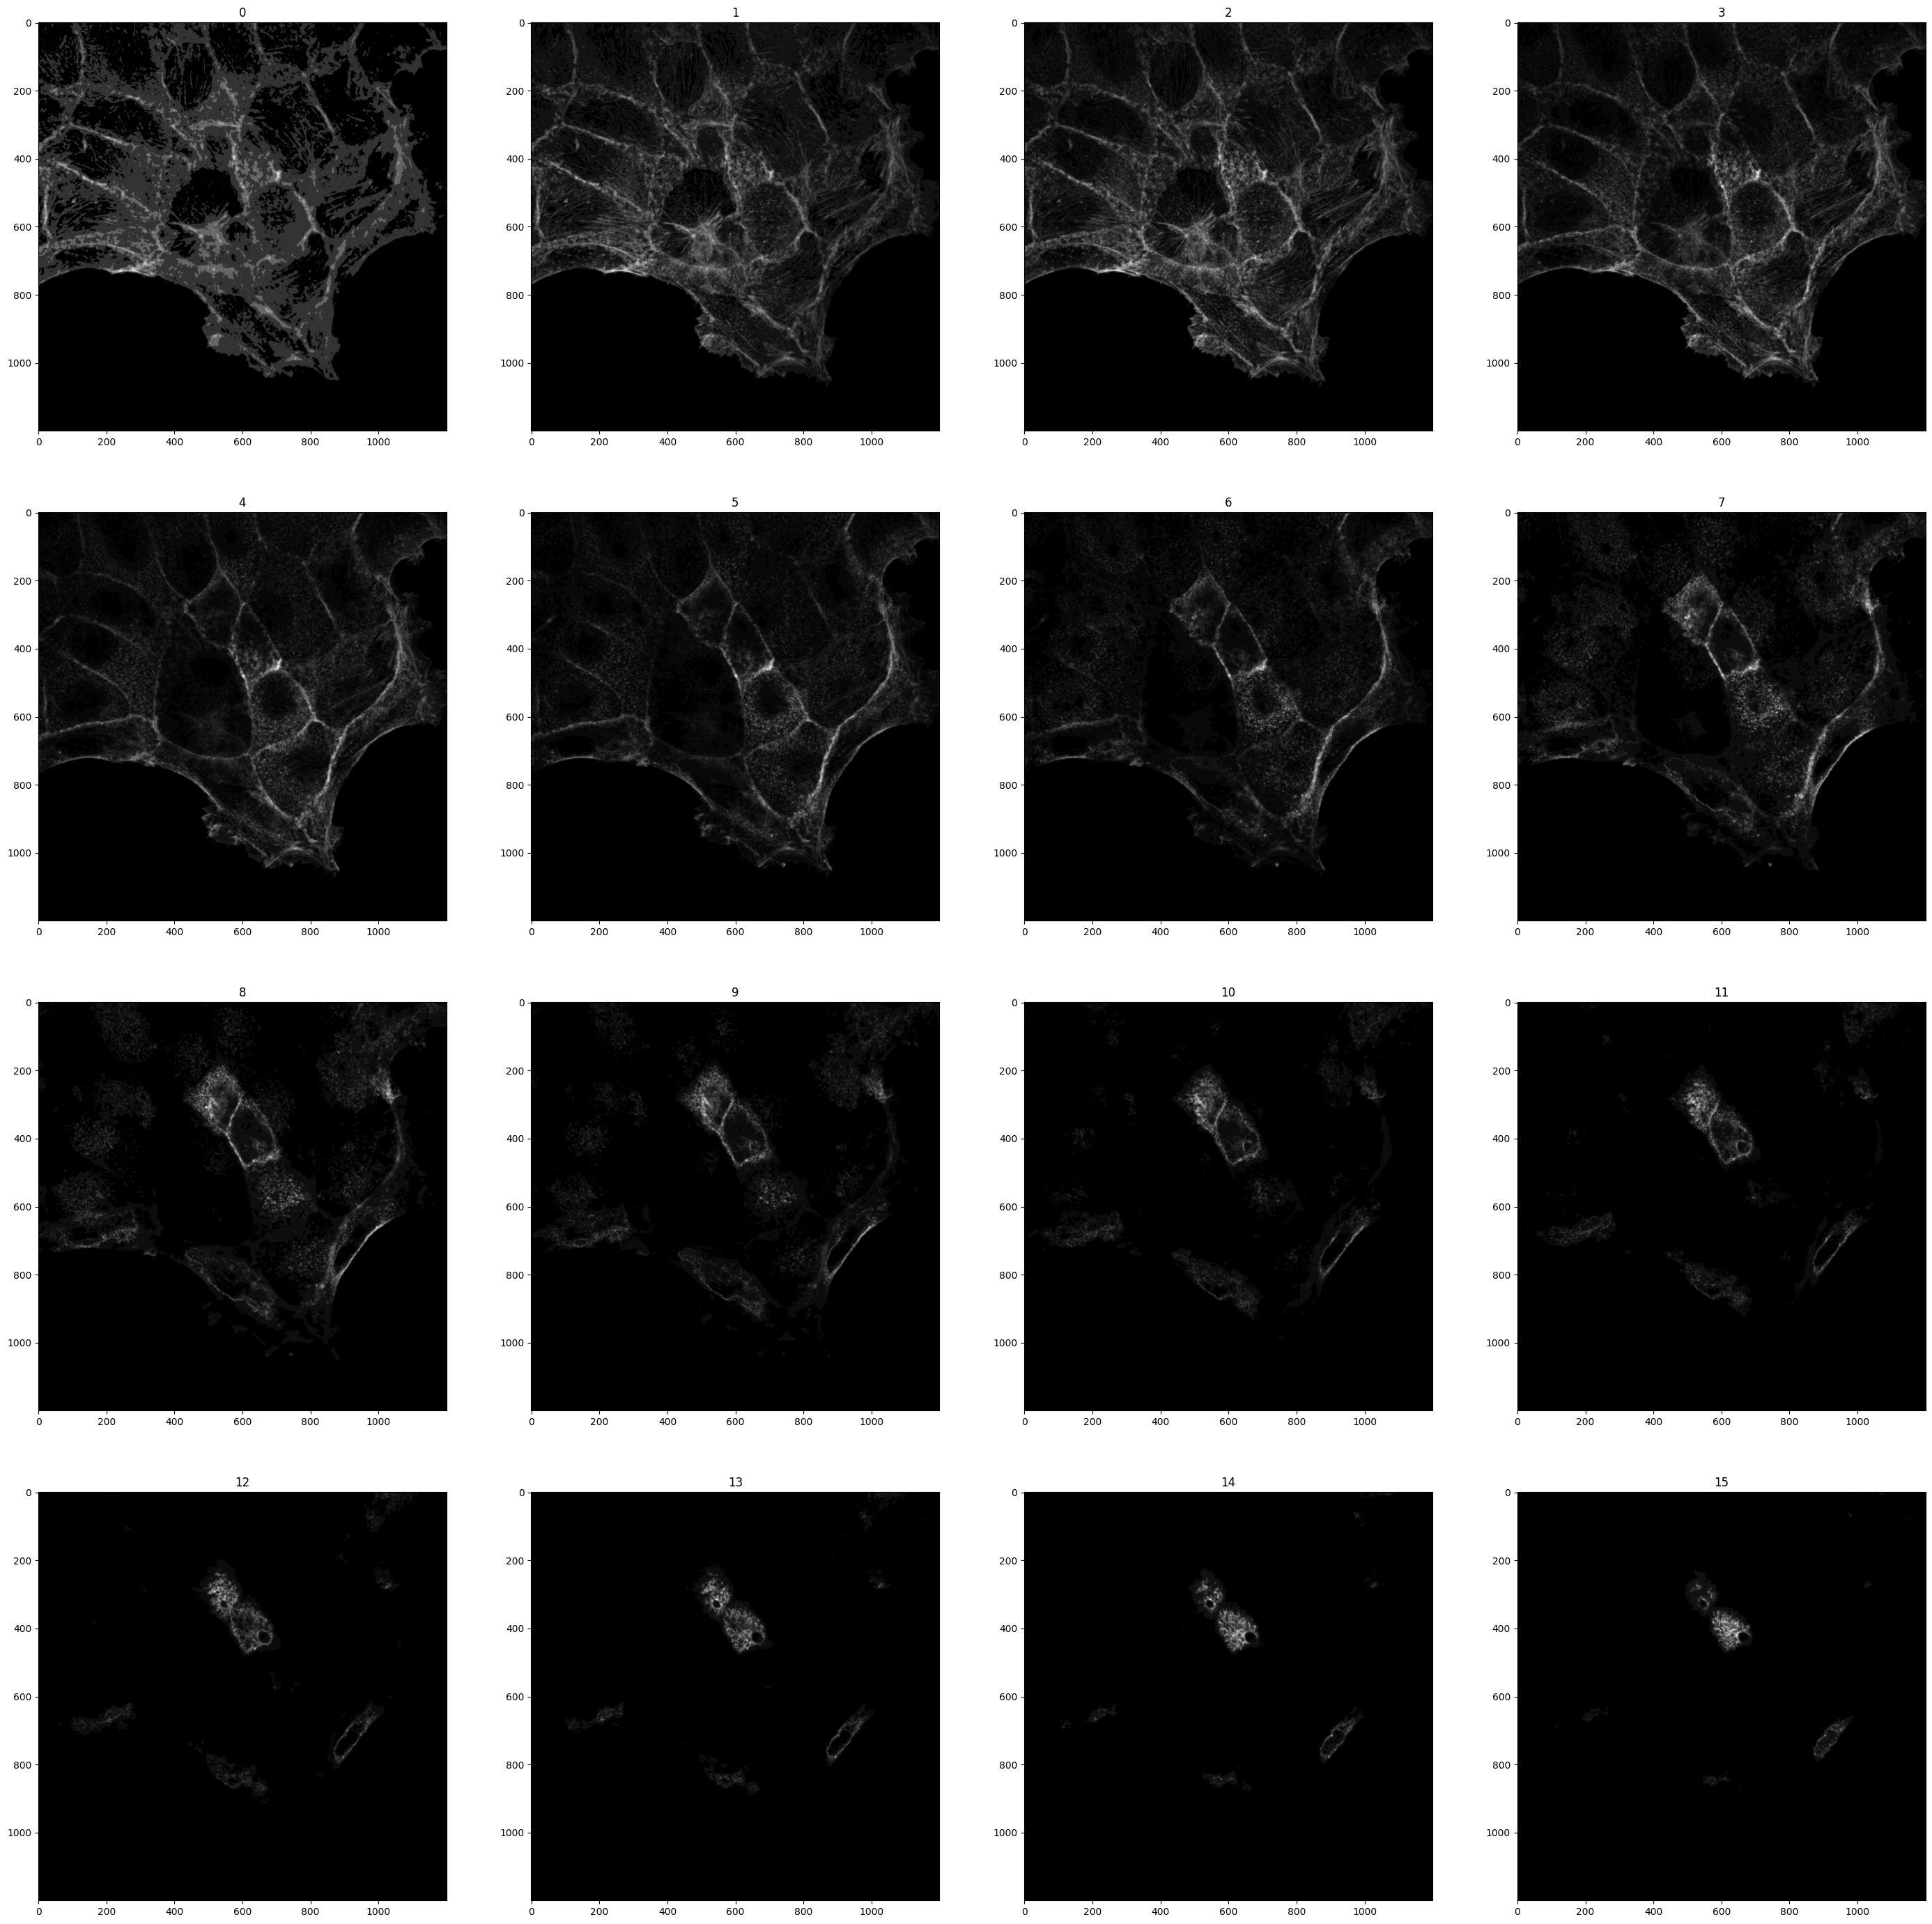

In [20]:
stack_len = len(img_stack)
rows = stack_len//4
cols = stack_len//rows
fig, a = plt.subplots(rows, cols, figsize=(35,35))
k = 0
for i in range(rows):
    for j in range(cols):
        a[i, j].imshow(img_stack[k], cmap='gray')
        a[i,j].set_title(k)
        k += 1

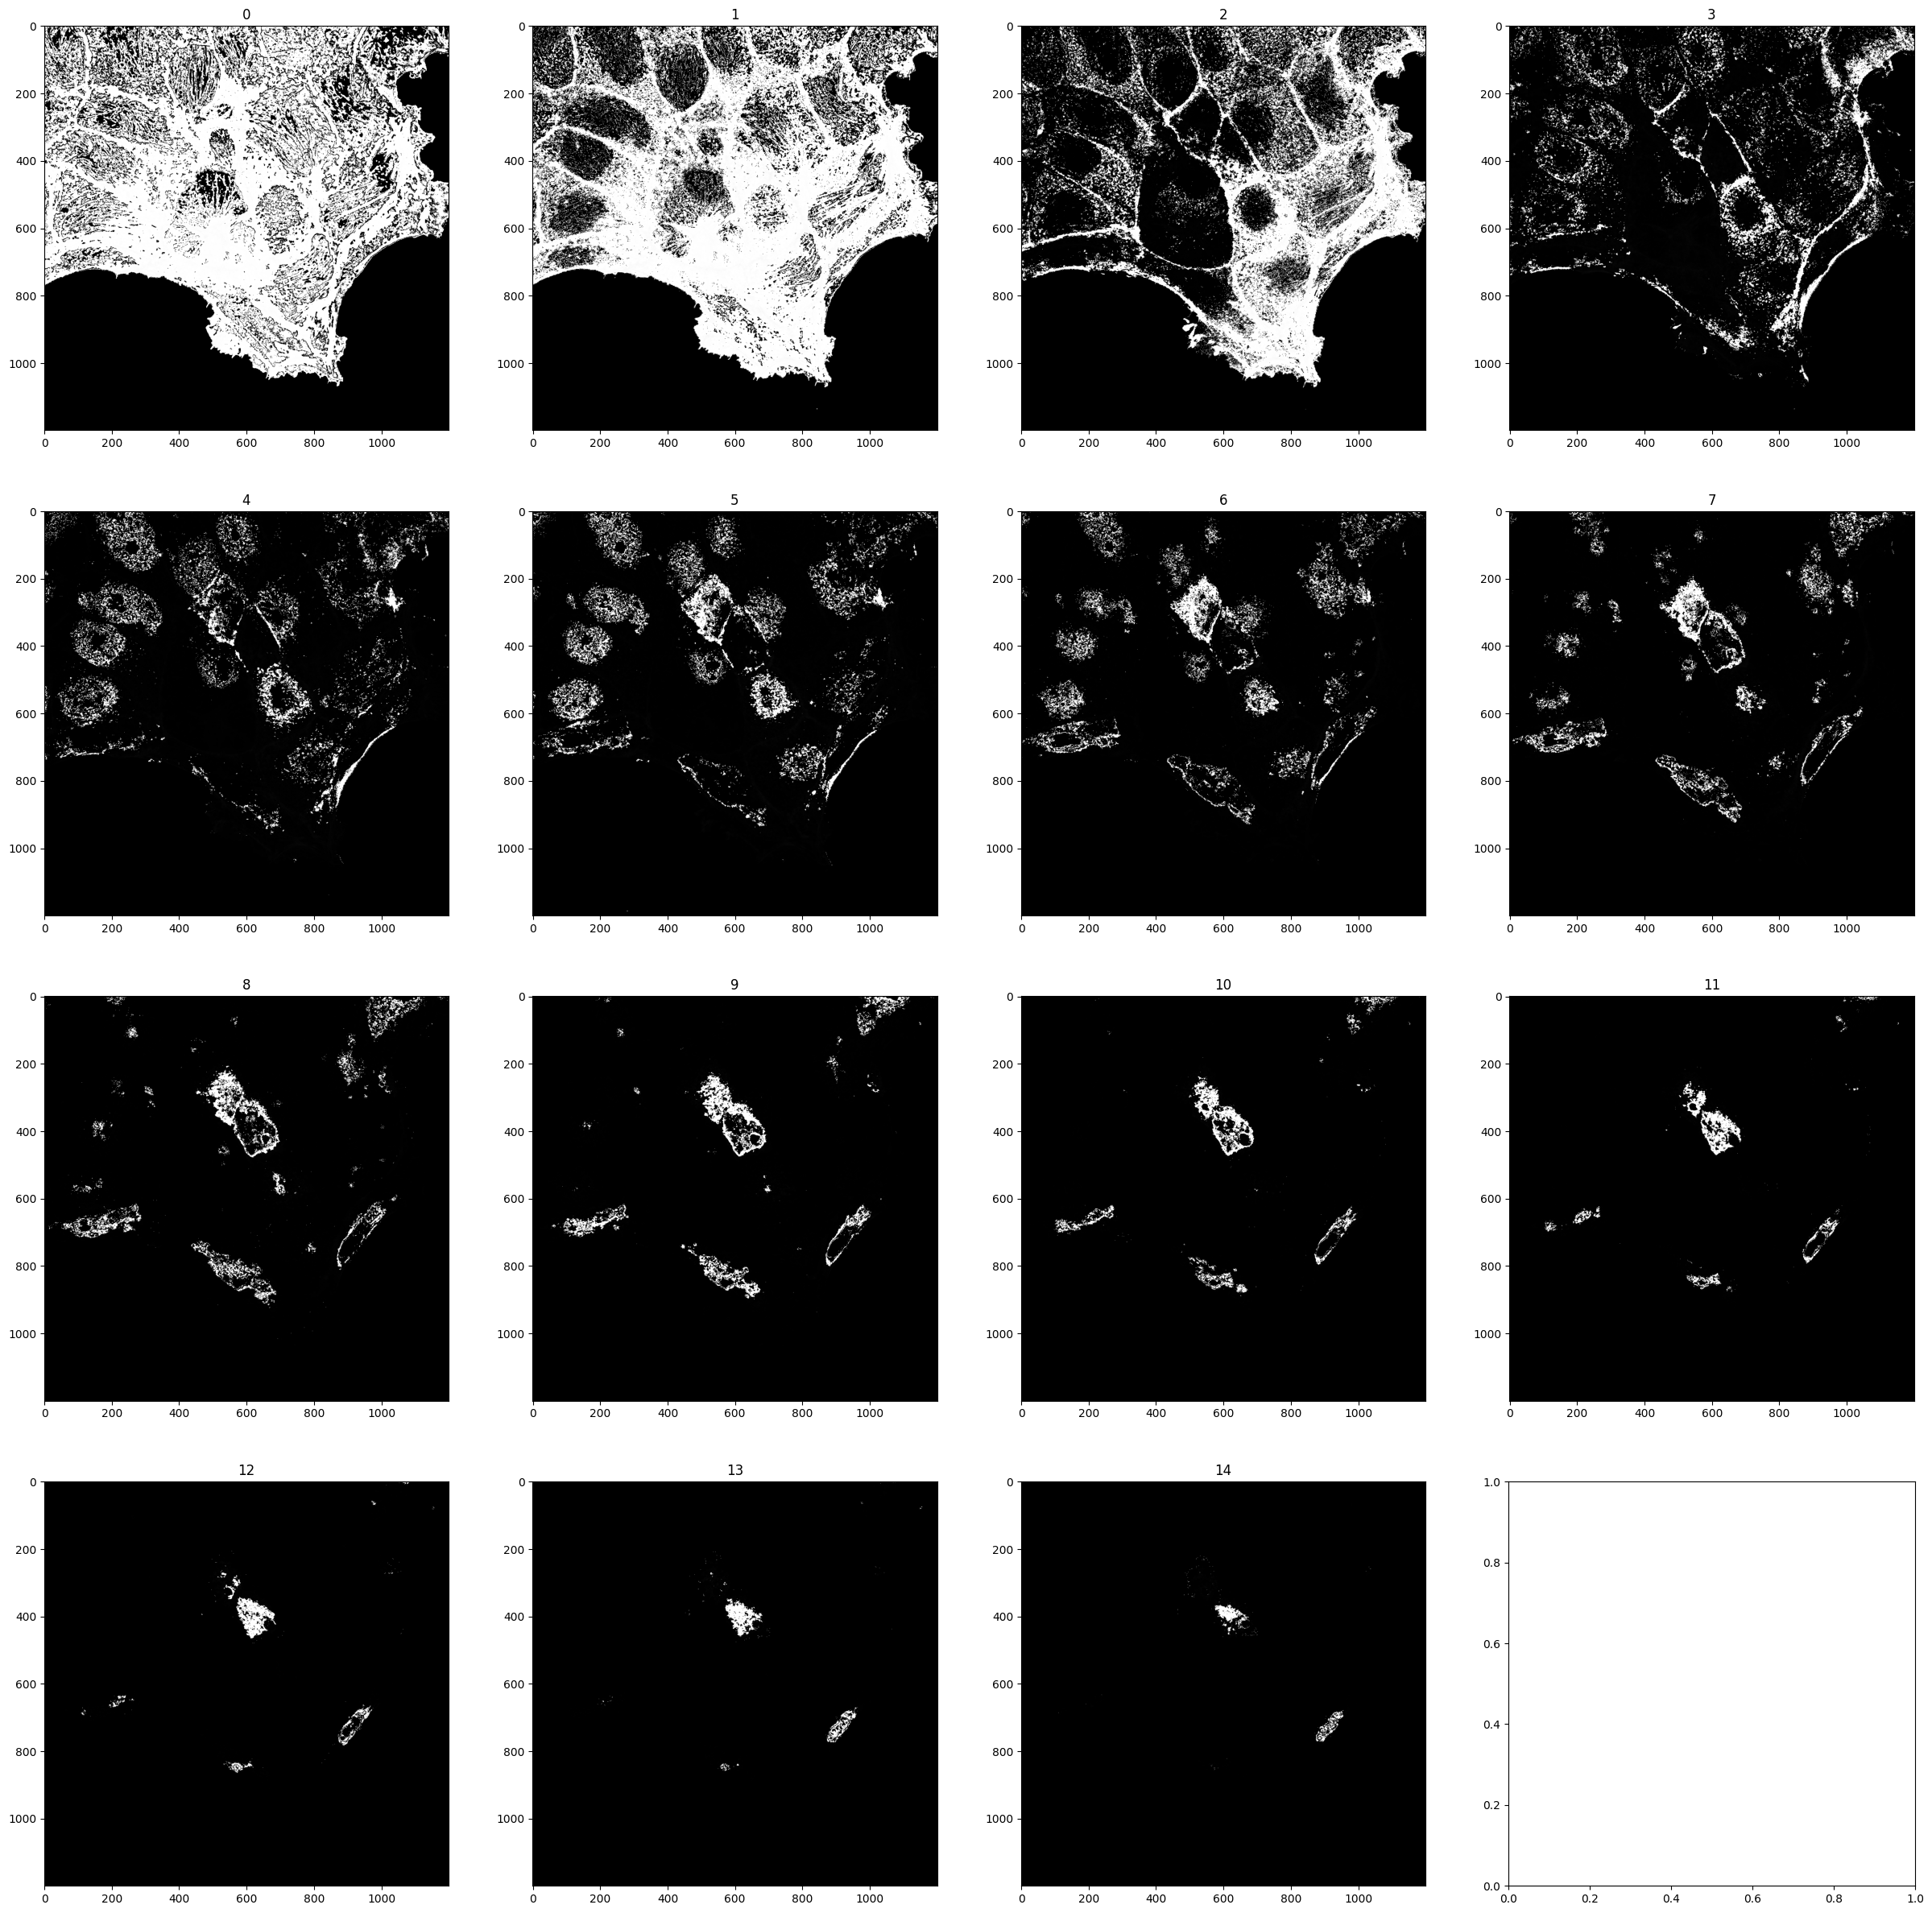

In [5]:
stack_len = len(img_stack)
rows = stack_len//4
cols = stack_len//rows
fig, a = plt.subplots(rows, cols, figsize=(30,30))
k = 0
for i in range(rows):
    for j in range(cols):
        a[i, j].imshow(img_stack[k]- img_stack[k+1], cmap='gray')
        a[i,j].set_title(k)
        k += 1
        if k == 15:
            break

In [6]:
def zero_pad(img: np.ndarray, kernel: np.ndarray):
    M, N = img.shape
    m,n = kernel.shape
    padded_img = np.zeros((M+m, N+n))
    padded_kernel = np.zeros((M+m, N+n))
    padded_img[:M, :N] = img
    padded_kernel[:m, :n] = kernel
    return padded_img, padded_kernel

In [7]:
def convolution(img: np.ndarray, kernel: np.ndarray):
    kernel = kernel[::-1, ::-1]
    new_img = np.zeros_like(img)
    M, N = img.shape
    m, n = kernel.shape
    y_center = (m-1)//2
    x_center = (n-1)//2
    # y_arr = np.arange(M-m+1)
    # x_arr = np.arange
    for i in range(M-m+1):
        for j in range(N-n+1):

            new_img[i+y_center, j+x_center] = np.round(np.sum(kernel * img[i:i+m, j:j+n]),2)
    return new_img[y_center:-y_center, x_center:-x_center]

In [8]:
# 1.1.
def normal_img(img:np.ndarray):
    return ((img-img.min())/(img.max()-img.min()))*255

def zero_pad(img: np.ndarray, kernel: np.ndarray):
    M, N = img.shape
    m, n = kernel.shape
    x=2
    padded_img = np.zeros((x*M, x*N))
    padded_k = np.zeros((x*M, x*N))
    padded_img[::x,::x] = img
    m_f, m_c = int(np.floor(m/2)), int(np.ceil(m/2))
    n_f, n_c = int(np.floor(n/2)), int(np.ceil(n/2))
    padded_k[M-m_f:M+m_c, N-n_f:N+n_c] = kernel
    return padded_img, padded_k

def gaussian_filter(kernel_size:tuple, sigma: float, k: float, a: float = None):
    filter = np.zeros(kernel_size)
    M, N = kernel_size
    rows = int(((M-1)* 2** 0.5)/ 2)
    cols = int(((N-1)* 2** 0.5)/ 2)
    for i in range(rows):
        for j in range(cols):
            r1 = ((M//2 - i)**2 + (N//2 - j)**2)**0.5
            r2 = M//2-i
            r3 = N//2 -j
            filter[i, j] = k * np.exp (-r1**2/(2*sigma**2))
            filter[i, -j-1] =  k * np.exp (-r1**2/(2*sigma**2))
            filter[-i-1, j] = k * np.exp (-r1**2/(2*sigma**2))
            filter[-i-1, -j-1] = k * np.exp (-r1**2/(2*sigma**2))
            filter[i, M//2] = k * np.exp (-r2**2/(2*sigma**2))
            filter[-i-1, M//2] = k * np.exp (-r2**2/(2*sigma**2))
            filter[N//2, j] = k * np.exp (-r3**2/(2*sigma**2))
            filter[N//2, -j-1] = k * np.exp (-r3**2/(2*sigma**2))

    filter[M//2, N//2] = k
    if a: return filter + a
    return filter
def filter_freq_domain(img: np.ndarray, kernel: np.ndarray):
    img, k = zero_pad(img, kernel)
    ifft_img = np.fft.fft2(img)
    ifft_img = ifft_img * k
    ifft_img = np.fft.ifft2(ifft_img)
    ifft_img = (np.real(ifft_img)**2 + np.imag(ifft_img) ** 2) ** 0.5
    ifft_img = normal_img(ifft_img)
    return ifft_img

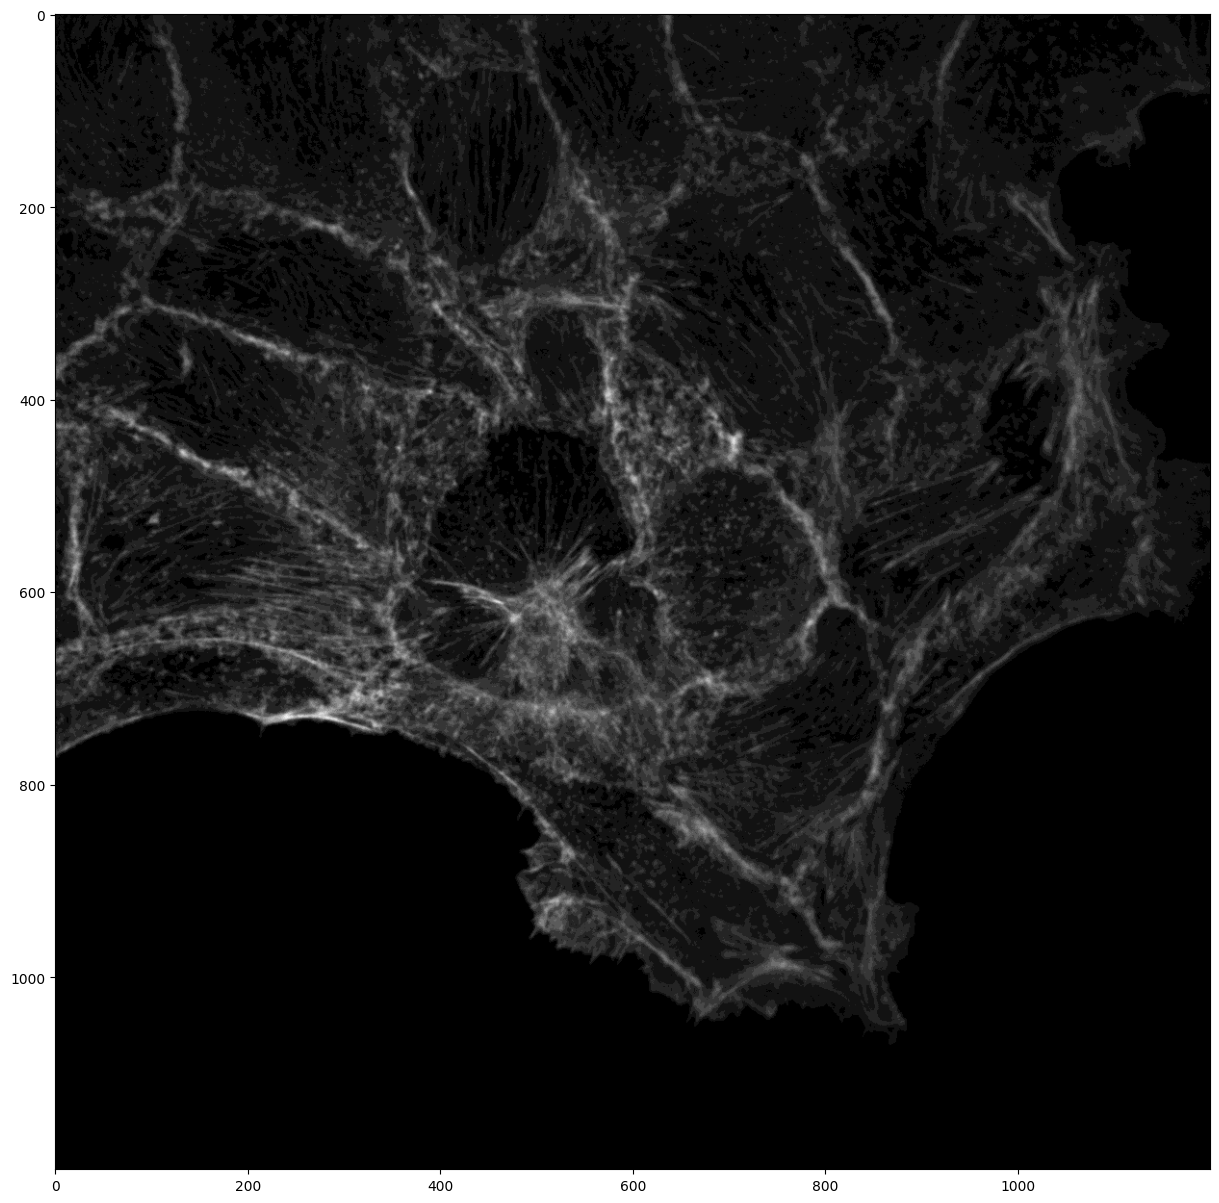

In [166]:
cells = img_stack[2].copy().astype(np.int16)
t = cells - img_stack[5]
temp = np.copy(img_stack[1])
if t.min() < 0:
    t += np.abs(t.min())
d = 18
t[t < d] = 1
t[t >= d] = 0
# temp[t == 1] = 0
# print(np.unique(img_stack[3]))
# print(np.unique(img_stack[7]))
# print(np.unique(t))
plt.figure(figsize=(15,15))
plt.imshow(temp, cmap='gray')
# plt.imshow(t, cmap='gray')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


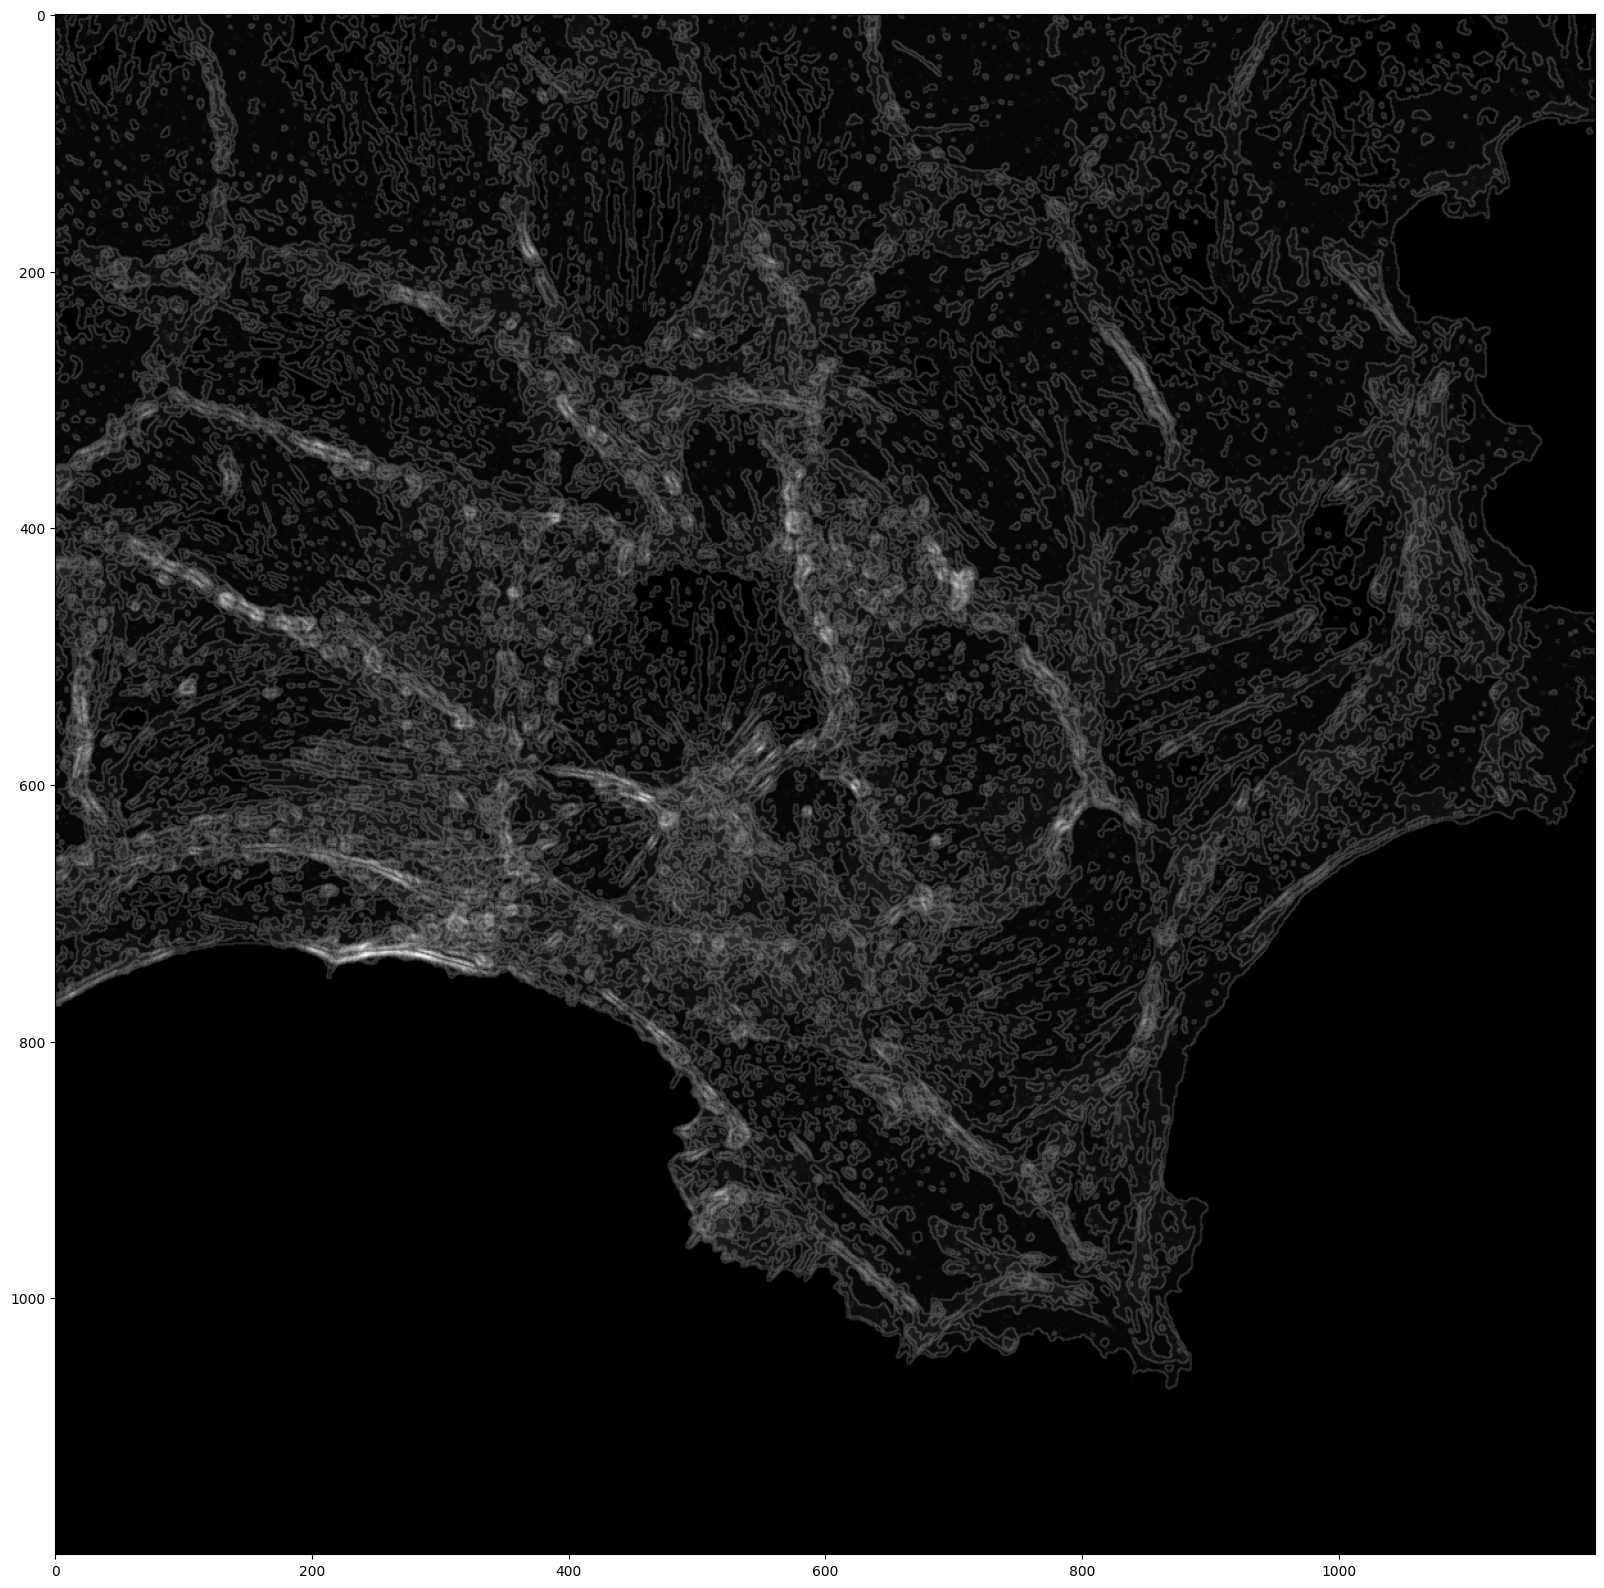

In [184]:
window_name = ('Sobel Demo - Simple Edge Detector')
scale = 1
delta = 0
ddepth = cv2.CV_16S


# Load the image
# src = cv2.imread(temp, cv2.IMREAD_COLOR)
# Check if image is loaded fine
if temp is None:
    print ('Error opening image: ')


src = cv2.GaussianBlur(temp, (5, 5), 0)
# gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
# gray = src
# lap = cv2.Laplacian(temp, 50, 100)

# grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# # Gradient-Y
# # grad_y = cv2.Scharr(gray,ddepth,0,1)
# grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


# abs_grad_x = cv2.convertScaleAbs(grad_x)
# abs_grad_y = cv2.convertScaleAbs(grad_y)


# grad = cv2.addWeighted(abs_grad_x, 1, abs_grad_y, 1, 0)
# test = temp + lap+grad
# print(np.unique(test))
plt.figure(figsize=(20,20))
plt.imshow(src, cmap='gray')
# # cv2.imshow(window_name, grad)
# # cv2.waitKey(0)


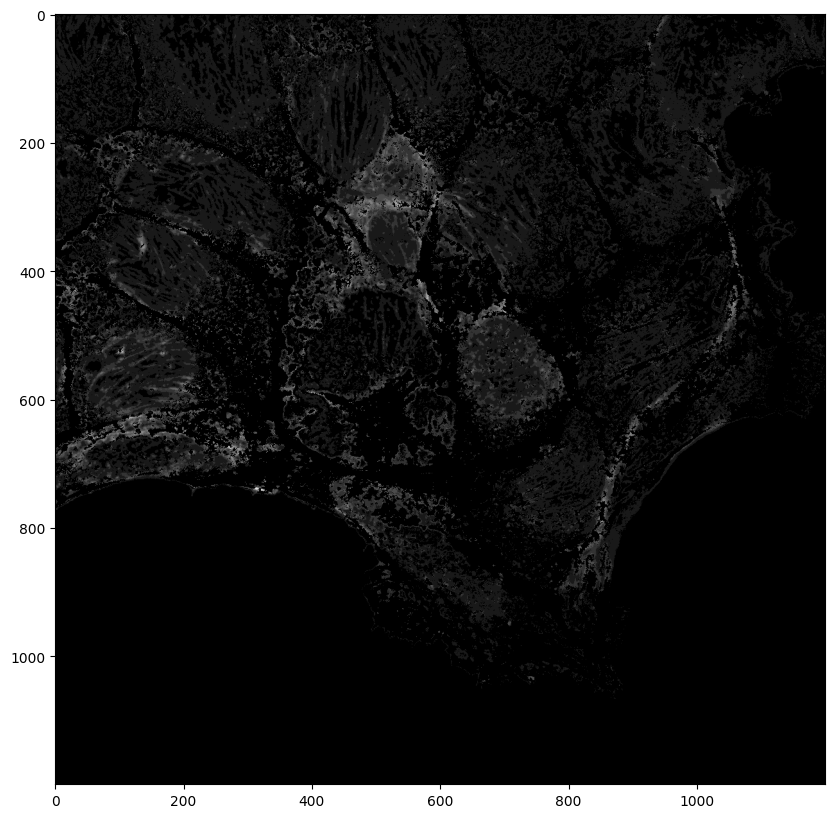

In [93]:
cells = img_stack[4].astype(float) - img_stack[5].astype(float)
cells += np.abs(cells.min())
cells[cells < 7] = 0
cells[cells >= 7] = 1
t = img_stack[1].copy()
t[cells == 1] = 0
t[cells == 0] *= 10
plt.figure(figsize=(10,10))
plt.imshow(t, cmap='gray')

In [40]:
%run -i "C:\\Users\\talro\\iCloudDrive\\תואר ראשון מתמטיקה\\שנה ג'\\סמסטר ב'\\עיבוד תמונה\\Practice10\\p10.ipynb"

In [41]:
kernel = np.ones((5,5))